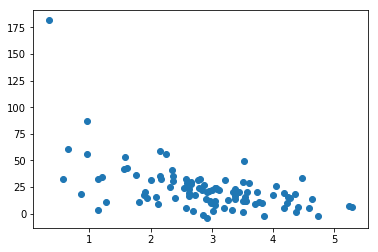

In [1]:
# L4, S23

# L4, S24
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2)

pageSpeeds = np.random.normal(3.0, 1.0, 100)
purchaseAmount = np.random.normal(50.0, 30.0, 100) / pageSpeeds
plt.scatter(pageSpeeds, purchaseAmount)
plt.show()

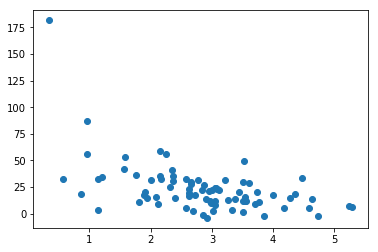

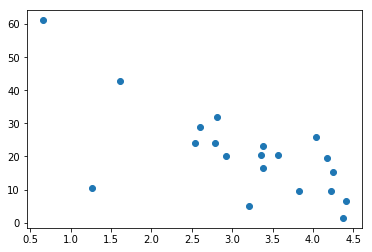

In [2]:
X_train = pageSpeeds[:80]
X_test = pageSpeeds[80:]

y_train = purchaseAmount[:80]
y_test = purchaseAmount[80:]

plt.scatter(X_train, y_train)
plt.show()

plt.scatter(X_test, y_test)
plt.show()

In [3]:
x = np.array(X_train)
y = np.array(y_train)

p4 = np.poly1d(np.polyfit(x, y, 6))

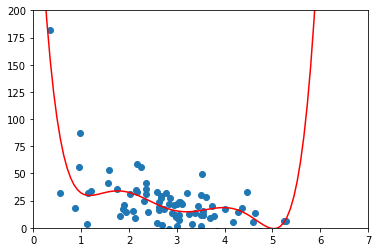

In [4]:
xp = np.linspace(0, 7, 100)
axes = plt.axes()
axes.set_xlim([0, 7])
axes.set_ylim([0, 200])
plt.scatter(x, y)
plt.plot(xp, p4(xp), c='r')
plt.show()

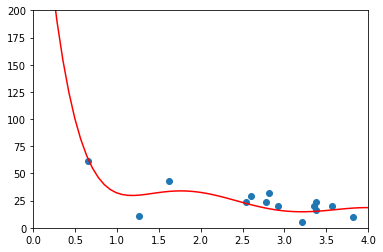

In [5]:
testx = np.array(X_test)
testy = np.array(y_test)

axes = plt.axes()
axes.set_xlim([0,4])
axes.set_ylim([0, 200])
plt.scatter(testx, testy)
plt.plot(xp, p4(xp), c='r')
plt.show()

In [6]:
from sklearn.metrics import r2_score
r2_score(testy, p4(testx))

0.60501194703556183

In [7]:
r2_score(y, p4(x))

0.6025441707110506

In [8]:
# L4, S25
# L4, S28

# Create fake income/age clusters for N people in k clusters
def createClusteredData(N, k):
    np.random.seed(10)
    pointsPerCluster = float(N) / k
    X = []
    
    for i in range(k):
        incomeCentroid = np.random.uniform(20000.0, 200000.0)
        ageCentroid = np.random.uniform(20.0, 70.0)
        for j in range(int(pointsPerCluster)):
            X.append([np.random.normal(incomeCentroid, 10000.0), 
                      np.random.normal(ageCentroid, 2.0)])
    
    X = np.array(X)
    return X
    



[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


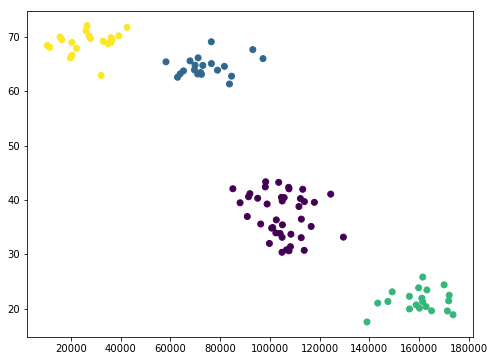

In [9]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale

data = createClusteredData(100,5)

model = KMeans(n_clusters=4)

# Import to scale data to normalize it! Important for good results
model.fit(scale(data))

print(model.labels_)

plt.figure(figsize=(8,6))
plt.scatter(data[:,0], data[:,1], c=model.labels_.astype(np.float))
plt.show()


In [10]:
# L4, S32
import pandas as pd
from sklearn import tree

input_file = "DataScience-Python3/PastHires.csv"
df = pd.read_csv(input_file, header=0)
df.head()

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,Y,4,BS,N,N,Y
1,0,N,0,BS,Y,Y,Y
2,7,N,6,BS,N,N,N
3,2,Y,1,MS,Y,N,Y
4,20,N,2,PhD,Y,N,N


In [11]:
d = {'Y': 1, 'N' : 0}
df['Hired'] = df['Hired'].map(d)
df['Employed?'] = df['Employed?'].map(d)
df['Top-tier school'] = df['Top-tier school'].map(d)
df['Interned'] = df['Interned'].map(d)

d = {'BS':0, 'MS': 1, 'PhD': 2}
df['Level of Education'] = df['Level of Education'].map(d)
df.head()

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,1,4,0,0,0,1
1,0,0,0,0,1,1,1
2,7,0,6,0,0,0,0
3,2,1,1,1,1,0,1
4,20,0,2,2,1,0,0


In [12]:
features = list(df.columns[:6])
features

['Years Experience',
 'Employed?',
 'Previous employers',
 'Level of Education',
 'Top-tier school',
 'Interned']

In [13]:
y = df.Hired
X = df[features]
clf = tree.DecisionTreeClassifier()
clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

Fontconfig error: Cannot load default config file



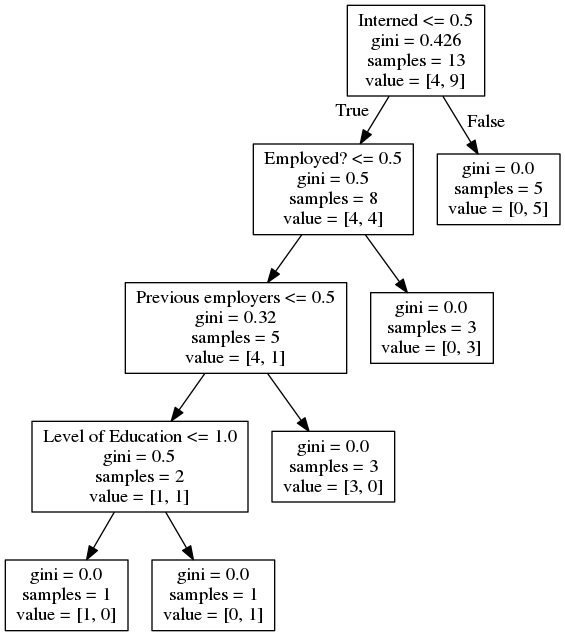

In [14]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
import pydotplus as pydot

dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=features)  
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [15]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 10)
clf.fit(X,y)

# Predict employment of an employed 10-year veteran
print(clf.predict(np.array([10,1,4,0,0,0]).reshape(1,-1)))


# Predict employment of an unemployed 10-year veteran
print(clf.predict(np.array([10,0,4,0,0,0]).reshape(1,-1)))

[1]
[1]


Fontconfig error: Cannot load default config file



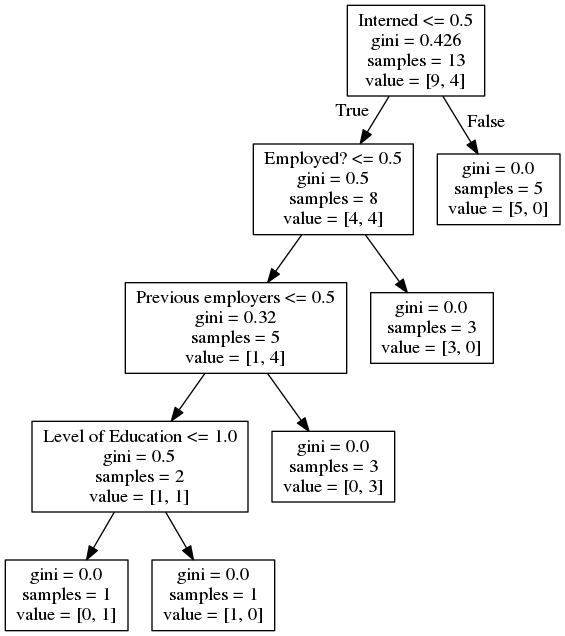

In [16]:
y = df.Hired * -1 + 1
X = df[features]
clf = tree.DecisionTreeClassifier()
clf.fit(X,y)
dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=features)  
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())


In [17]:
# Create fake income/age clusters for N people in k clusters
def createLabeledClusteredData(N, k):
#     np.random.seed(10)
    pointsPerCluster = float(N) / k
    X = []
    y = []
    
    for i in range(k):
        incomeCentroid = np.random.uniform(20000.0, 200000.0)
        ageCentroid = np.random.uniform(20.0, 70.0)
        for j in range(int(pointsPerCluster)):
            X.append([np.random.normal(incomeCentroid, 10000.0), 
                      np.random.normal(ageCentroid, 2.0)])
            y.append(i)
    
    X = np.array(X)
    y = np.array(y)
    return X, y

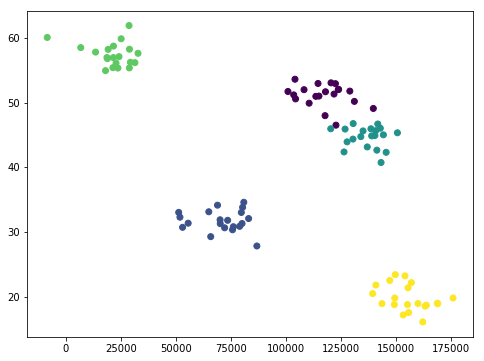

In [18]:
# S4 L35
X, y = createLabeledClusteredData(100, 5)

plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y.astype(np.float))
plt.show()


In [19]:
from sklearn import svm, datasets

C = 1.0
svc = svm.SVC(kernel='linear', C=C).fit(X,y)

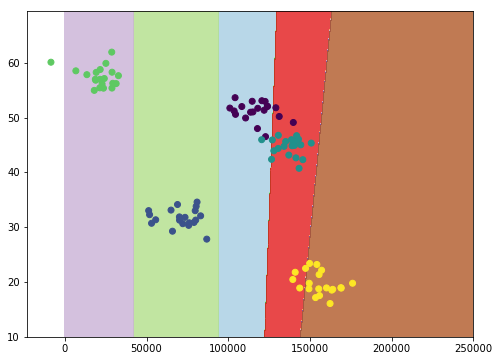

In [20]:
def plotPredictions(clf):
    xx, yy = np.meshgrid(np.arange(0,250000,10),
                        np.arange(10,70,0.5))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    
    plt.figure(figsize=(8,6))
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y.astype(np.float))
    plt.show()

plotPredictions(svc)

In [21]:
# svc = svm.SVC(kernel='poly', C=C).fit(X,y)
# plotPredictions(svc)

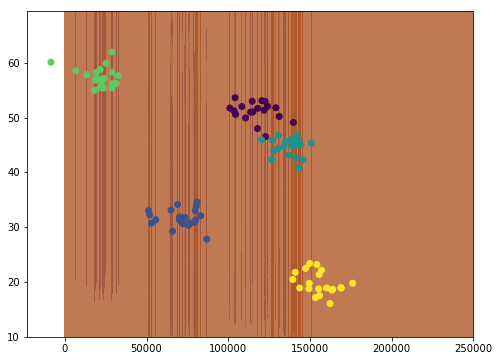

In [22]:
svc = svm.SVC(kernel='rbf', C=C).fit(X,y)
plotPredictions(svc)

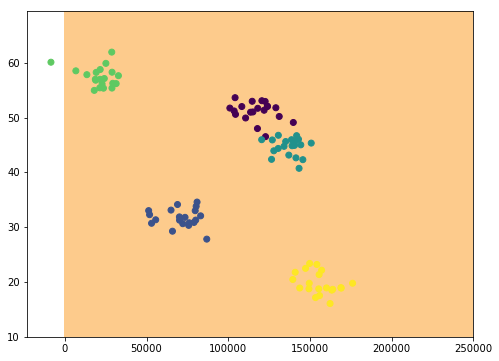

In [23]:
svc = svm.SVC(kernel='sigmoid', C=C).fit(X,y)
plotPredictions(svc)

In [24]:
svc = svm.SVC(kernel='precomputed', C=C).fit(X,y)
plotPredictions(svc)

ValueError: X.shape[0] should be equal to X.shape[1]